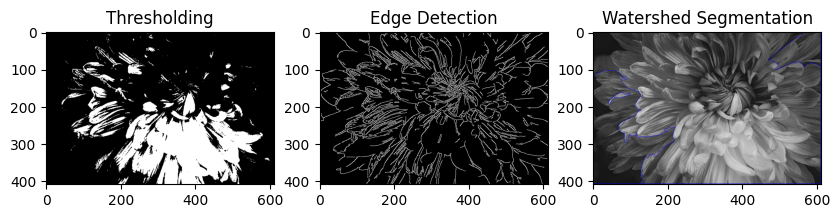

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('11111.jpg', cv2.IMREAD_GRAYSCALE)


_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) #above 127 become white 


edges = cv2.Canny(image, 100, 200)

color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
gray_blur = cv2.GaussianBlur(image, (5, 5), 0)    #applyling gaussian blur 


_, binary = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) 


kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(binary, kernel, iterations=3)
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)  #calculate the distance rom the background for each pixel
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


_, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0


cv2.watershed(color_image, markers)
color_image[markers == -1] = [255, 0, 0]   #mark boundary with red color


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(thresh, cmap='gray'), plt.title("Thresholding")
plt.subplot(1, 3, 2), plt.imshow(edges, cmap='gray'), plt.title("Edge Detection")
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)), plt.title("Watershed Segmentation")
plt.show()
